# Classification II: Logistic Regression

**OBJECTIVES**:

- Differentiate between *Regression* and *Classification* problem settings
- Connect Least Squares methods to Classification through Logistic Regression
- Interpret coefficients of the model in terms of probabilities
- Discuss performance of classification model in terms of accuracy
- Understand the effect of an imbalanced target class on model performance

- regression tries to predict a continuous number
- classification tries to predict a category
- classification with regression tries to predict the probability of being in a class, by outputting a continuous variable.

### Classification Problems as Predicting Categorical Target Feature



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

### Some example datasets in sklearn for classification
<center>
<img src = https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg>
</center>

In [2]:
cancer = load_breast_cancer()
#print(cancer.DESCR)
#think of the dataset as a class with attributes
#.data
#.target
#.feature_names
X = cancer.data
y = cancer.target

In [3]:
#create a dataframe
cancer_df = pd.DataFrame(X, columns = cancer.feature_names)
cancer_df['malignant'] = cancer.target
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


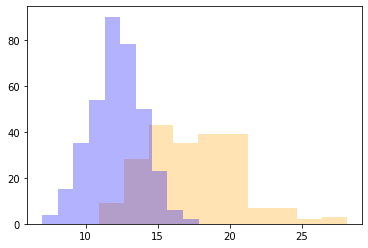

In [22]:
# histogram of mean radius for malignant records vs non malignant records
plt.hist(cancer_df.loc[cancer_df['malignant']==0]['mean radius'], color='orange', alpha=.3);
plt.hist(cancer_df.loc[cancer_df['malignant']==1]['mean radius'], color='blue', alpha = .3);
# seems to be some of an overlap in the middle, but this could be a good feature to look at

In [23]:
# another solution:

malignant
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean radius, dtype: object

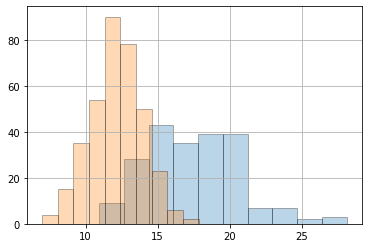

In [28]:
cancer_df.groupby('malignant')['mean radius'].hist(alpha = .3, edgecolor='black')

In [16]:
cancer_df.loc[cancer_df['malignant']==1]['mean radius']

19     13.540
20     13.080
21      9.504
37     13.030
46      8.196
        ...  
558    14.590
559    11.510
560    14.050
561    11.200
568     7.760
Name: mean radius, Length: 357, dtype: float64

### Our Motivating Example



In [30]:
# dataset based on if someone defaulted on their credit card
default = pd.read_csv('data/Default.csv', index_col = 0)

In [31]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [32]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


### Visualizing Default by Continuous Features

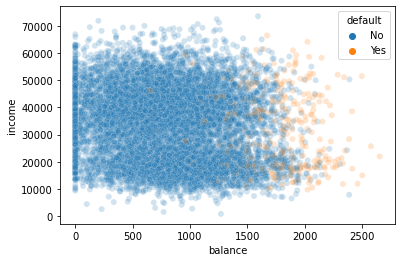

In [41]:
#scatterplot of balance vs. income colored by default status
sns.scatterplot(x='balance', y='income', data=default, hue='default', alpha=.2);

#balance seems like a decent predictor, but income does not seem as strong

In [ ]:
#boxplots for balance and income by default


## Considering only balance as the predictor

In [46]:
#create binary default column
default.value_counts()


In [ ]:
default['default_binary'] = np.where(default['default'] == 'Yes', 1, 0)

In [49]:
default[default['default'] == 'Yes']

,default,student,balance,income,default_binary
137,Yes,Yes,1486.998122,17854.397028,1
174,Yes,Yes,2205.799521,14271.492253,1
202,Yes,Yes,1774.694223,20359.506086,1
207,Yes,No,1889.599190,48956.171589,1
210,Yes,Yes,1899.390626,20655.200003,1
...,...,...,...,...,...
9913,Yes,No,2148.898454,44309.917173,1
9922,Yes,Yes,1627.898323,17546.997016,1
9950,Yes,No,1750.253150,51578.940163,1
9952,Yes,No,1515.606239,48688.512086,1


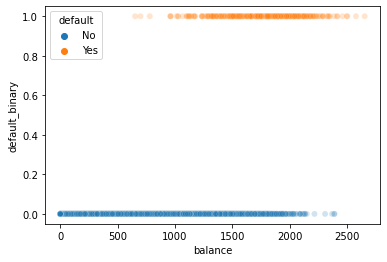

In [50]:
#scatter of Balance vs Default
sns.scatterplot(x='balance', y='default_binary', data=default, hue='default', alpha=.2);


##### PROBLEM

1. Build a `LinearRegression` model with balance as the predictor.
2. Interpret the $rmse$ for your regressor.
3. Predict the default for balances: `[500, 1000, 1500, 2000, 2500]`.  Do these make sense?

In [59]:
X= default[['balance']]

In [60]:
y=default['default_binary']

In [61]:
lr =LinearRegression()

In [62]:
lr.fit(X, y)

LinearRegression()

In [63]:
lr.coef_

array([0.00012987])

In [64]:
lr.intercept_

-0.07519195884622262

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, y)

931691.6167814438

In [78]:
new_balances = np.array([500,1000,1500,2000,2500]).reshape(-1,1)

In [79]:
yhat = lr.predict(new_balances)

In [80]:
yhat

array([-0.01025587,  0.05468022,  0.11961631,  0.1845524 ,  0.2494885 ])

### The Sigmoid aka Logistic Function


$$y = \frac{1}{1 + e^{-x}}$$

- this will give us a value between 0 and one, like the sigmoid function- never goes below 0 or above 1!
- then we can extract probabilities from these values. And based on those probabilities, we can say- are you a 0 or a 1?

In [88]:
#define the logistic
def logistic(x):
    return 1/(1+np.exp(-x))

In [86]:
#domain
x = np.linspace(-5, 5, 100)

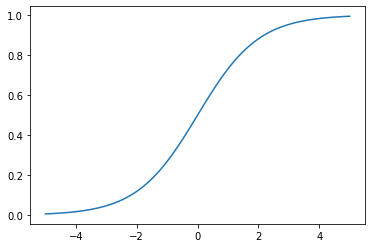

In [90]:
#plot it
plt.plot(x, logistic(x));

### Usage should seem familiar

Fit a `LogisticRegression` estimator from `sklearn` on the features:

```python 
X = default[['balance']]
y = default['binary_default']
```

In [91]:
#instantiate
lgr = LogisticRegression()

In [94]:
#define X and y
X= default[['balance']]
y=default['default_binary']

In [95]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
#fit on the train
lgr.fit(X_train, y_train)

LogisticRegression()

In [98]:
#examine train and test scores - will give pct correct
lgr.score(X_train, y_train)

0.9728

In [99]:
lgr.score(X_test, y_test)

0.9716

In [105]:
# What would the baseline have been?
default['default_binary'].value_counts(normalize=True)
# if you guesses don't default, without any math... you would be right 96% of the time
# so did we really add that much more value?
# so this data set is very imbalanced. THere are some ways to handle this:
# can oversample the responders? 
# there is a whole library dedicated to this in python
# it's called imblearn: https://imbalanced-learn.org/stable/
# k nearest neighbors is pretty good at imbalanced data, but logistic regression is not
# so just be aware of this!


0    0.9667
1    0.0333
Name: default_binary, dtype: float64

### Similarities to our earlier work

In [106]:
#there is a coefficient
lgr.coef_

array([[0.00554754]])

In [108]:
#there is an intercept
lgr.intercept_

array([-10.73798927])

In [ ]:
# we learned the ax+b in the function listed below.

### Where was the line?

The version of the logistic we have just developed is actually:

$$ y = \frac{e^{ax + b}}{1 + e^{ax + b}} $$

Its output represents probabilities of being labeled the positive class in our example.  This means that we can interpret the output of the above function using our parameters, remembering that we used the `balance` feature to predict `default`.

In [114]:
def predictor(x):
    line = lgr.coef_[0]*x + lgr.intercept_
    return np.e**line/(1 + np.e**line)

In [115]:
#predict 1000 - the result here is a probability- likelihood to default
predictor(1000)

array([0.00553868])

In [116]:
#predict 2000 
predictor(2000)

array([0.58833787])

In [118]:
#estimator has this too
lgr.predict_proba(X_test)
# first entry is probablility that it will defatul, second is that it won't
# they'll add to 1, so you really only need the first.

array([[9.41231669e-01, 5.87683315e-02],
       [9.98432108e-01, 1.56789216e-03],
       [9.99978296e-01, 2.17040652e-05],
       ...,
       [9.99978296e-01, 2.17040652e-05],
       [9.99705533e-01, 2.94467013e-04],
       [8.79065407e-01, 1.20934593e-01]])

In [128]:
#let's predict 1, only if we're more than 70% probability of default
# set to where second column great than .7
new_preds= np.where(lgr.predict_proba(X_test)[:,1] > .7, 1, 0)
# sum where we got default, divide by total to get the pct correct.
1- sum(new_preds)/len(y_test)



0.996

### Using Categorical Features

In [129]:
default.head(2)

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0


In [130]:
default['student_binary'] = np.where(default.student == 'No', 0, 1)

In [134]:
# train test split ( y already defined above)
X_train, X_test = train_test_split(X, random_state=42)

In [140]:
#instantiate and fit
X= default[['student_binary']]

lgr_student = LogisticRegression()

lgr_student.fit(X_train, y_train)

LogisticRegression()

In [141]:
#performance - not so great, compared to baseline
lgr_student.score(X_train, y_train)

0.9664

In [142]:
#coefficients - this is tough to interpret as it's not linear
#it's called a log odd and no one really talks about it
lgr_student.coef_

array([[0.56425161]])

In [145]:
#compare probabilities - so the probability of someone who
# is not a student defaulting is .027
lgr_student.predict_proba(np.array([[0]]))

array([[0.97229408, 0.02770592]])

In [146]:
# the probability of someone who is a studetn defaulting is .047
# so it's higher
lgr_student.predict_proba(np.array([[1]]))

array([[0.95229145, 0.04770855]])

### Using Multiple Features



In [186]:
default.columns

Index(['default', 'student', 'balance', 'income', 'default_binary',
       'student_binary'],
      dtype='object')

In [187]:
features = ['balance', 'income', 'student_binary']
X = default.loc[:, features]
y = default['default_binary']

In [188]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, random_state=42)

In [197]:
lgr_all = LogisticRegression().fit(X_train, y_train)

In [190]:
print(f'Train Score: {lgr_all.score(X_train, y_train)}')
print(f'Test Score: {lgr_all.score(X_test, y_test)}')
# since there are so few defaulters, there is a chance that the test and 
# train don't have the same amount of defaulter. 
# this is an issue with train test split- but we can control for it using
# the stratify argument. 

Train Score: 0.9669333333333333
Test Score: 0.9672


**Predictions**:

- student: yes
- balance: 1,500 dollars
- income: 40,000 dollars

In [195]:
X1 = np.array([[1, 1500, 40_000]])

In [196]:
lgr_all.predict_proba(X1)

array([[1., 0.]])

- student: no
- balance: 1,500 dollars
- income: 40,000 dollars

In [193]:
predict2 = np.array([[0, 1500, 40000]])

In [194]:
lgr_all.predict_proba(predict2)

array([[1., 0.]])

In [ ]:
# these results are suspect since before we saw that students were 
# more likely to default. 
# it's probably because of collinearity 
# there is a similar relationship to having a high balance and defaulting
# as there is a relationship between being a student and havine a high balance. 


### This is similar to our multicollinearity in regression; we will call it confounding

<center>
<img src = 'images/default_confound.png'/>
</center>

In [ ]:
b_sort = default.sort_values(by = 'balance')
students = b_sort.loc[b_sort['student_binary'] == 1]
non_students = b_sort.loc[b_sort['student_binary'] == 0]
num_defaults = b_sort['binary_default'].sum()

In [ ]:
plt.plot(students['balance'], students['binary_default'].cumsum()/students['binary_default'].sum(), label = 'students')
plt.plot(non_students['balance'], non_students['binary_default'].cumsum()/non_students['binary_default'].sum(), label = 'non-students')
plt.title('Confounding in the Default Data')
plt.xlabel('Balance')
plt.ylabel('Default Rate')
plt.grid()
plt.xlim(0, 2300);
plt.legend();
plt.savefig('images/default_confound.png')